<a href="https://colab.research.google.com/github/humaira1996/Colab/blob/main/2_baad16_AVGword2vecwithCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
%matplotlib inline
import nltk
from gensim.models import Word2Vec, KeyedVectors
import numpy as np
import pandas as pd
import sqlite3
import re
import matplotlib.pyplot as plt
#import nbconvert
import warnings
warnings.filterwarnings("ignore")
import os

In [ ]:
from google.colab import drive
#drive.mount('/gdrive')
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/SM_FRIEND_NEWSDATA/BAAD16DATASET")
!ls

Dataset1.csv  Dataset2.csv


In [ ]:
import pandas as pd
import glob
import os

# setting the path for joining multiple files
files = os.path.join("Dataset*.csv")


# list of merged files returned
files = glob.glob(files)

print("Resultant CSV after joining all CSV files at a particular location...");



Resultant CSV after joining all CSV files at a particular location...


In [ ]:
# joining files with concat and read_csv
data = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(data)

                     label                                               text  \
0      shunil_gongopaddhay  থেকে কত দূরে চলে এসেছে ভরত। সে হেসে উঠল আপন মন...   
1            humayun_ahmed  এতে ভয় কমে যায়। বল একটা গল্প।’ ‘তুমি বল।’ আনিস...   
2                 shomresh  হবে। ওই দেখুন ওর এক চোখ কানা। ডান দিকটা দিয়ে দ...   
3            humayun_ahmed  বললাম, আপনি ওর গায়ে হাত দিলেন কেন? ষণ্ডাগণ্ডা ...   
4            humayun_ahmed  হত! আবার চাদর মুড়ি দিয়ে নিজেকে গুটিয়ে ফেলি। যে...   
...                    ...                                                ...   
17961            shordindu  করিয়া সহজভাবে বলিল—ঘোড়া দুটিকে বৰ্গা খুলিয়া ছা...   
17962  shunil_gongopaddhay  না। আমরা সবাই থোড়া কুচ সাবক্রিপশান দিয়ে মেয়েটা...   
17963  shunil_gongopaddhay  কাকাবাবু, আমি আগে কখনও অজ্ঞান হইনি। নিজের কাছে...   
17964   nihar_ronjon_gupta  মধ্যে প্রবেশ করলেন। প্রথমেই ওরা সুশান্ত মল্লিক...   
17965        humayun_ahmed  আপনার অফিস? হুঁ। আপনার টেবিলের উপর কী? বাক্সের...   

       is_valid  
0        

In [ ]:
import os
os.chdir("/content/drive/My Drive/SM_FRIEND_NEWSDATA")
!ls

 authorshipattribution.ipynb	   requirements
 BAAD16DATASET			   samledata.csv
 bengali_stemmer		   setup.cfg
 bengali-stemmer-dev		   setup.py
 bengali_stemmer.egg-info	   stemmer.ipynb
 bengali_word2vec		   Stopwords.csv
 bengali_word2vec.model		   stopwordsnew.csv
 build				   tests
'Copy of ulm_train.csv'		   try_w2v.ipynb
 dist				   ulm1.csv
 LICENSE			   ulm2.csv
'naivebias on bangla news.ipynb'   wbc.ipynb
'new data.ipynb'		   word2vec.ipynb
 pytest.ini			  'word2veclast try.ipynb'
 README.rst


In [ ]:
#new clean data
#data = pd.read_csv('ulm_train.csv').apply(lambda x: x.astype(str).str.lower())

In [ ]:
data.drop_duplicates(keep=False, inplace=True)

In [ ]:
stopwords = pd.read_csv('Stopwords.csv')

def to_encode(bangla_word):
    return bangla_word.encode('utf-8')


def to_decode(bangla_word):
    return bangla_word.decode('utf-8')

set_stop = set(stopwords['words'].map(to_encode))

In [ ]:
from bengali_stemmer.rafikamal2014 import RafiStemmer
stemmer = RafiStemmer()

texts = data['text'].values

In [ ]:
import re
def cleanhtml(sentence):
    cleanr1 = re.compile('/.*?')
    cleantext = re.sub(cleanr1,' ',sentence)
    cleanr = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    cleantext = re.sub(cleanr,' ',sentence)
    return cleantext

In [ ]:

def clean_punct(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#|।|’|‘]', r'', sentence)
    cleaned1 = re.sub(r'[.|,|(|)|\|/]', r'', cleaned)
    cleaned = re.sub(r'[০|১|২|৩|৪|৫|৬|৭|৮|৯]', r'', cleaned1)
    cleaned1 = re.sub(r'[-|=]', r' ', cleaned)
    cleaned = re.sub(r'[A|B|C|D|E|F|G|H|I|J|K|L|M|N|O|P|Q|R|S|T|U|V|W|X|Y|Z|a|b|c|d|e|f|g|h|i|j|k|l|m|n|o|p|q|r|s|t|u|v|w|x|y|z]', r'', cleaned1)
    cleaned1 = re.sub(r'[1|2|3|4|5|6|7|8|9|0]', r'', cleaned)
    return cleaned1

In [ ]:
def pre_process(data):
    i=0
    str1=' '
    final_string = []
    final_words = []
    
    s=''

    for sentence in data:
        filtered_sentence = []

        for w in sentence.split():
            for cleaned_word1 in cleanhtml(w).split():
                for cleaned_word in clean_punct(cleaned_word1).split():
                    if len(cleaned_word)>2:
                        if(to_encode(cleaned_word) not in set_stop):
                            s = stemmer.stem_word(cleaned_word)
                            if len(s)>2:
                                final_words.append(s)
                                filtered_sentence.append(s)
                        else:
                            continue
                    else:
                        continue

        str1 = " ".join(filtered_sentence)
        final_string.append(str1)
    return final_string

In [ ]:
X = pre_process(data['text'].values)
#y = data['label'].values

In [ ]:
Y = data['label'].values

In [ ]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle=Flase)# this is for time series split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42) # this is random splitting
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2,random_state=42) # this is random splitting

In [ ]:
label=np.unique(y_train)

label

array(['MZI', 'bongkim', 'humayun_ahmed', 'manik_bandhopaddhay', 'nazrul',
       'nihar_ronjon_gupta', 'robindronath', 'shirshendu', 'shomresh',
       'shordindu', 'shorotchandra', 'shottojit_roy',
       'shunil_gongopaddhay', 'tarashonkor', 'toslima_nasrin',
       'zahir_rayhan'], dtype=object)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
#vectorizer.fit(X_train) # fit has to happen only on train data

W2VEC MODEL

In [ ]:
i=0
list_of_sentance_train=[]
for sentance in X_train:
    list_of_sentance_train.append(sentance.split())

In [ ]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [ ]:
# this line of code trains your w2v model on the give list of sentances
w2v_model=Word2Vec(list_of_sentance_train,min_count=5,size=300, workers=10)

In [ ]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  45043
sample words  ['ঘুরব', 'আসেনি', 'বেলাল', 'কামাল', 'সুরঞ্জন', 'যেত', 'কদিন', 'হামলা', 'তল্পিতল্পা', 'ছোটাছু', 'ছিঃ', 'নেহাত', 'গর্দভ', 'বছর', 'গিয়', 'বাড়ি', 'দিব্যি', 'বসন্ত', 'তোম', 'মারব', 'দয়া', 'কেমন', 'কথা', 'সকল', 'মিল', 'হিন্দু', 'দেশ', 'মারো', 'তোমা', 'ঝামেলা', 'কায়দা', 'বাঁচা', 'রাস্তায়', 'একদল', 'ছেল', 'দাঁড়িয়', 'চেচিয়', 'ছেলে', 'পাড়', 'ঢুক', 'বেরো', 'সাত', 'দেখ', 'চেন', 'একজন', 'আলম', 'নাম', 'প্রায়', 'চাঁদা', 'চাই']


In [ ]:
from tqdm import tqdm
import numpy as np

CONVERT TRAINDATA TEXT

In [ ]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance_train): # for each review/sentence
    sent_vec = np.zeros(300) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors_train = np.array(sent_vectors)
#print(np.asarray(sent_vectors).shape)
#print(sent_vectors[0])

#print(np.asarray(X).shape)

100%|██████████| 11497/11497 [33:28<00:00,  5.72it/s]


CONVERTING CV DATA TEXT

In [ ]:
i=0
list_of_sentance_cv=[]
for sentance in X_cv:
    list_of_sentance_cv.append(sentance.split())

In [ ]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance_cv): # for each review/sentence
    sent_vec = np.zeros(300) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_cv.append(sent_vec)
sent_vectors_cv = np.array(sent_vectors_cv)
#print(np.asarray(sent_vectors_cv).shape)
#print(sent_vectors_cv[0])

100%|██████████| 2875/2875 [09:02<00:00,  5.30it/s]


CONVERTING TEST DATA TEXT

In [ ]:
i=0
list_of_sentance_test=[]
for sentance in X_test:
    list_of_sentance_test.append(sentance.split())

In [ ]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance_test): # for each review/sentence
    sent_vec = np.zeros(300) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_test.append(sent_vec)
sent_vectors_test = np.array(sent_vectors_test)
#print(np.asarray(sent_vectors_test).shape)
#print(sent_vectors_test[0])

100%|██████████| 3594/3594 [10:32<00:00,  5.68it/s]


FIT WITH A MODEL 
# **GaussianNB classifier**

In [ ]:
from sklearn . naive_bayes import GaussianNB
from sklearn import metrics
from sklearn . metrics import accuracy_score
from sklearn . model_selection import cross_val_score

In [ ]:
Gmodel = GaussianNB() . fit ( sent_vectors , y_train )

 #neigh.fit(sent_vectors_train, y_train)

# *Cross validation for gaussian nb*

In [ ]:
#using k-fold

accuracy = cross_val_score(Gmodel, sent_vectors_cv, y_cv, scoring='accuracy', cv = 10)
print(accuracy)

[0.84375    0.84027778 0.81597222 0.83333333 0.85069444 0.83972125
 0.83972125 0.82229965 0.82926829 0.81881533]


In [ ]:
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

Accuracy of Model with Cross Validation is: 83.33853561749903


In [ ]:
#using cross_validate() function

from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(Gmodel, sent_vectors_cv, y_cv, scoring=scoring)
sorted(scores.keys())

['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']

In [ ]:
scores['test_recall_macro']

array([0.82057047, 0.79662518, 0.8181968 , 0.79661294, 0.78334037])

# *accuracy for test data*

In [ ]:
from sklearn . metrics import classification_report

In [ ]:

y_test_pred  = Gmodel . predict ( sent_vectors_test )


In [ ]:
#trainig accuracy for gaussian neigh bayes
y_train_pred = Gmodel . predict(sent_vectors)
print ( 'Model accuracy %s' % accuracy_score ( y_train , y_train_pred ) )

Model accuracy 0.831434287205358


In [ ]:

print ( 'Model accuracy %s' % accuracy_score ( y_test , y_test_pred ) )
print ( 'accuracy normalized %s' % accuracy_score ( y_test , y_test_pred , normalize = False ) )
print ( classification_report ( y_test , y_test_pred ) )

#xlabels . append ( "Gaussian" )
#ylabels . append ( accuracy_score ( y_test , y_test_pred ) ) 

Model accuracy 0.8277685030606566
accuracy normalized 2975
                     precision    recall  f1-score   support

                MZI       0.86      0.87      0.87       206
            bongkim       0.53      0.96      0.68       108
      humayun_ahmed       0.99      0.93      0.96       919
manik_bandhopaddhay       0.81      0.55      0.65        88
             nazrul       0.21      0.76      0.33        45
 nihar_ronjon_gupta       0.80      0.99      0.88        95
       robindronath       0.79      0.38      0.51       245
         shirshendu       0.86      0.89      0.88       216
           shomresh       0.93      0.94      0.93       310
          shordindu       0.91      0.66      0.76       165
      shorotchandra       0.77      0.86      0.81       250
      shottojit_roy       0.98      0.96      0.97       167
shunil_gongopaddhay       0.98      0.74      0.85       404
        tarashonkor       0.84      0.61      0.70       160
     toslima_nasrin      

In [ ]:
print(label)

['fe' 'humayun' 'ij' 'mk' 'rg' 'rn']


In [ ]:
label=np.array(['fe', 'humayun', 'ij', 'mk', 'rg', 'rn'], dtype=object)

Confusion matrix, without normalization
[[180   0  10   0   0   0   0   0   0   0   0   0   0   0  16   0]
 [  0 104   0   0   0   0   3   0   0   0   0   0   0   1   0   0]
 [ 28   0 853   2   0   0   0   1   4   0   0   0   0   2  29   0]
 [  0   0   0  48  13   0   3   8   0   0   2   0   3   8   3   0]
 [  0   2   0   0  34   0   1   0   0   0   3   0   0   4   1   0]
 [  0   0   0   0   1  94   0   0   0   0   0   0   0   0   0   0]
 [  0  45   0   2  70   1  93   0   0   6  25   0   0   1   2   0]
 [  0   0   0   1   3   0   3 192  13   0   2   1   0   0   1   0]
 [  2   0   0   0   1   0   0   5 290   0   0   1   1   0  10   0]
 [  0  33   0   1   0  18   0   0   0 109   0   2   0   2   0   0]
 [  0  11   0   3   3   0  13   0   0   4 215   0   0   1   0   0]
 [  0   0   0   1   0   1   0   0   0   0   0 160   1   0   4   0]
 [  0   0   0   0  17   1   1  13   3   0   0   0 300   0  59  10]
 [  0   2   0   1  18   3   1   0   0   1  32   0   0  97   5   0]
 [  0   0   0   0   0 

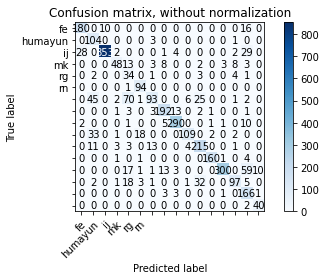

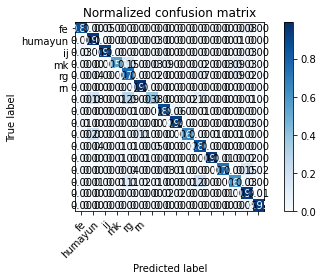

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_test_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=label, yticklabels=label,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.xlim(-0.5, len(np.unique(y_test))-0.5) # ADD THIS LINE
    plt.ylim(len(np.unique(y_test))-0.5, -0.5) # ADD THIS LINE
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_test_pred, classes=label,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_test_pred, classes=label, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# **SVM classifier**

In [ ]:
import sklearn
from sklearn import svm
from sklearn . model_selection import cross_val_score

In [ ]:
smodel = svm . SVC ( C = 3, gamma = 'scale', kernel = 'rbf' )

smodel . fit ( sent_vectors , y_train )



SVC(C=3)

# *Cross validation score for svm*

In [ ]:
#using k-fold

accuracy = cross_val_score(smodel, sent_vectors_cv, y_cv, scoring='accuracy', cv = 10)
print(accuracy)

#get the mean of each fold 
#print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[0.97 0.96 0.98 0.97 0.96 0.98 0.98 0.96 0.98 0.96]


In [ ]:
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

Accuracy of Model with Cross Validation is: 96.90464092140923


**Train** **accuracy**

In [ ]:
y_train_pred  = smodel . predict ( sent_vectors )

In [ ]:
print ( 'Model accuracy %s' % accuracy_score (  y_train , y_train_pred ) )

Model accuracy 0.9940854135861529


# *accuracy score for test data*

In [ ]:
from sklearn . metrics import classification_report
y_test_pred  = smodel . predict ( sent_vectors_test )
#y_cv_pred = smodel . predict(sent_vectors_cv)

In [ ]:
label=np.unique(y_train)

In [ ]:
print ( 'Model accuracy %s' % accuracy_score ( y_test , y_test_pred ) )
print ( 'accuracy normalized %s' % accuracy_score ( y_test , y_test_pred , normalize = False ) )
print ( classification_report ( y_test , y_test_pred ) )

Model accuracy 0.9844184752365053
accuracy normalized 3538
                     precision    recall  f1-score   support

                MZI       1.00      0.98      0.99       206
            bongkim       0.99      1.00      1.00       108
      humayun_ahmed       1.00      1.00      1.00       919
manik_bandhopaddhay       0.97      0.98      0.97        88
             nazrul       0.98      0.89      0.93        45
 nihar_ronjon_gupta       0.96      0.99      0.97        95
       robindronath       0.96      0.98      0.97       245
         shirshendu       1.00      0.96      0.98       216
           shomresh       1.00      0.99      0.99       310
          shordindu       0.99      0.96      0.98       165
      shorotchandra       0.97      0.98      0.98       250
      shottojit_roy       0.98      1.00      0.99       167
shunil_gongopaddhay       0.99      0.99      0.99       404
        tarashonkor       0.96      0.96      0.96       160
     toslima_nasrin      

Confusion matrix, without normalization
[[202   0   4   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 108   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0 915   0   0   0   0   0   0   0   0   0   0   2   1   0]
 [  0   0   0  86   0   1   1   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  40   0   2   0   0   0   0   0   0   2   1   0]
 [  0   0   0   0   0  94   0   0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0 241   0   0   2   1   0   1   0   0   0]
 [  0   0   0   1   0   0   2 208   0   0   3   1   0   0   1   0]
 [  0   0   0   0   1   0   0   0 306   0   0   1   2   0   0   0]
 [  0   1   0   0   0   1   0   0   0 159   1   1   0   2   0   0]
 [  0   0   0   0   0   0   4   0   0   0 245   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 167   0   0   0   0]
 [  0   0   0   0   0   1   0   1   0   0   0   0 399   0   3   0]
 [  0   0   0   2   0   1   0   0   0   0   2   0   1 154   0   0]
 [  0   0   0   0   0 

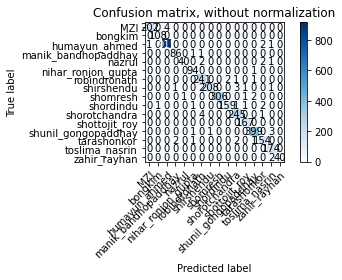

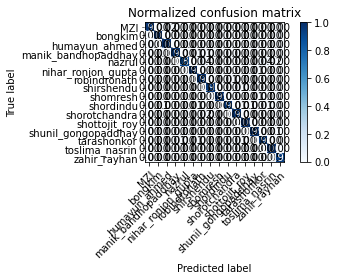

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_test_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=label, yticklabels=label,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.xlim(-0.5, len(np.unique(y_test))-0.5) # ADD THIS LINE
    plt.ylim(len(np.unique(y_test))-0.5, -0.5) # ADD THIS LINE
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_test_pred, classes=label,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_test_pred, classes=label, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# **logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
Lmodel = LogisticRegression ( multi_class = 'ovr' , solver = 'lbfgs' )

In [ ]:
Lmodel . fit ( sent_vectors , y_train )

LogisticRegression(multi_class='ovr')

## cross validation score for logistic regression 

In [ ]:
from sklearn import metrics
from sklearn . metrics import accuracy_score
from sklearn . model_selection import cross_val_score
accuracy = cross_val_score(Lmodel, sent_vectors_cv, y_cv, scoring='accuracy', cv = 10)
print(accuracy)

[0.97 0.97 0.97 0.96 0.97 0.97 0.97 0.94 0.95 0.96]


In [ ]:
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

Accuracy of Model with Cross Validation is: 96.24298296554393


In [ ]:
from sklearn . metrics import classification_report
from sklearn . model_selection import cross_val_score

y_test_pred  = Lmodel . predict ( sent_vectors_test )
y_train_pred = Lmodel . predict(sent_vectors)

In [ ]:
#train accuracy
print ( 'Model accuracy %s' % accuracy_score (  y_train , y_train_pred ) )

Model accuracy 0.9849525963294773


In [ ]:
print ( 'Model accuracy %s' % accuracy_score ( y_test , y_test_pred ) )
print ( 'accuracy normalized %s' % accuracy_score ( y_test , y_test_pred , normalize = False ) )
print ( classification_report ( y_test , y_test_pred,target_names=label  ) )

Model accuracy 0.976349471341124
accuracy normalized 3509
                     precision    recall  f1-score   support

                MZI       1.00      0.98      0.99       206
            bongkim       0.96      0.99      0.97       108
      humayun_ahmed       0.99      1.00      0.99       919
manik_bandhopaddhay       0.96      0.93      0.95        88
             nazrul       1.00      0.71      0.83        45
 nihar_ronjon_gupta       0.98      0.98      0.98        95
       robindronath       0.91      0.98      0.94       245
         shirshendu       0.99      0.98      0.99       216
           shomresh       0.99      0.98      0.99       310
          shordindu       0.97      0.95      0.96       165
      shorotchandra       0.96      0.95      0.96       250
      shottojit_roy       0.99      1.00      0.99       167
shunil_gongopaddhay       0.98      1.00      0.99       404
        tarashonkor       0.94      0.93      0.93       160
     toslima_nasrin       

In [ ]:
label=np.array(['MZI', 'bongkim', 'humayun_ahmed', 'manik_bandhopaddhay', 'nazrul',
       'nihar_ronjon_gupta', 'robindronath', 'shirshendu', 'shomresh',
       'shordindu', 'shorotchandra', 'shottojit_roy',
       'shunil_gongopaddhay', 'tarashonkor', 'toslima_nasrin',
       'zahir_rayhan'], dtype=object)


Confusion matrix, without normalization
[[195   0   9   0   0   0   0   0   0   0   0   0   0   0   2   0]
 [  0 103   0   0   0   0   3   0   0   1   0   0   0   1   0   0]
 [  4   0 910   0   0   0   0   1   0   0   0   0   0   2   2   0]
 [  0   0   1  75   1   2   1   2   0   0   1   0   2   2   1   0]
 [  0   0   0   0  29   0   7   0   0   0   2   0   1   5   1   0]
 [  0   0   0   0   0  92   0   0   0   0   0   1   2   0   0   0]
 [  0   2   0   1   1   0 233   0   0   3   4   0   1   0   0   0]
 [  0   0   0   1   0   0   3 202   5   0   2   1   1   0   1   0]
 [  0   0   0   0   0   0   0   0 303   0   0   3   1   0   3   0]
 [  0   4   0   0   0   3   1   0   0 153   0   1   0   3   0   0]
 [  0   0   0   0   0   0  11   0   0   1 237   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0 165   0   0   1   0]
 [  0   0   0   0   0   0   0   3   0   0   0   0 396   0   5   0]
 [  0   0   0   1   2   1   4   0   0   0   9   0   3 140   0   0]
 [  0   0   0   0   0 

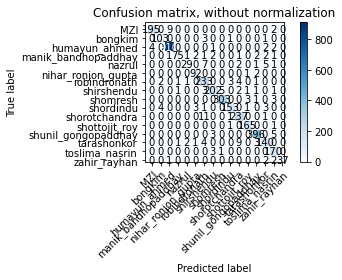

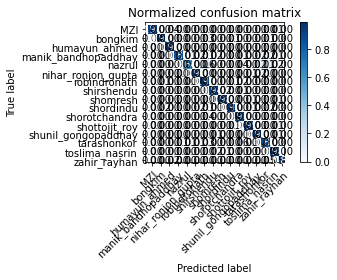

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_test_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=label, yticklabels=label,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.xlim(-0.8, len(np.unique(y_test))-0.8) # ADD THIS LINE
    plt.ylim(len(np.unique(y_test))-0.8, -0.8) # ADD THIS LINE
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_test_pred, classes=label,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_test_pred, classes=label, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rmodel = RandomForestClassifier ( n_estimators=100 )

In [ ]:
Rmodel . fit ( sent_vectors , y_train )

RandomForestClassifier()

# **CROSS VALIDATION**

In [ ]:
accuracy = cross_val_score(Rmodel, sent_vectors_cv, y_cv, scoring='accuracy', cv = 10)
print(accuracy)

[0.93 0.94 0.93 0.93 0.93 0.94 0.95 0.92 0.93 0.92]


In [ ]:
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

Accuracy of Model with Cross Validation is: 93.21767324816106


# **CLASSIFICATION REPORT**

In [ ]:
from sklearn . metrics import classification_report
from sklearn . model_selection import cross_val_score

y_test_pred  = Rmodel . predict ( sent_vectors_test )
y_train_pred = Rmodel . predict(sent_vectors)

In [ ]:
#training accuracy
print ( 'Model accuracy %s' % accuracy_score ( y_train , y_train_pred ) )

Model accuracy 1.0


In [ ]:
'MZI', 'bongkim', 'humayun_ahmed', 'manik_bandhopaddhay', 'nazrul',
       'nihar_ronjon_gupta', 'robindronath', 'shirshendu', 'shomresh',
       'shordindu', 'shorotchandra', 'shottojit_roy',
       'shunil_gongopaddhay', 'tarashonkor', 'toslima_nasrin',
       'zahir_rayhan'

In [ ]:
print ( 'Model accuracy %s' % accuracy_score ( y_test , y_test_pred ) )
print ( 'accuracy normalized %s' % accuracy_score ( y_test , y_test_pred , normalize = False ) )
print ( classification_report ( y_test , y_test_pred,target_names=label) )

Model accuracy 0.9565943238731218
accuracy normalized 3438
                     precision    recall  f1-score   support

                MZI       0.98      0.95      0.96       206
            bongkim       0.93      0.94      0.94       108
      humayun_ahmed       0.99      0.99      0.99       919
manik_bandhopaddhay       0.97      0.86      0.92        88
             nazrul       0.94      0.64      0.76        45
 nihar_ronjon_gupta       0.95      0.98      0.96        95
       robindronath       0.88      0.94      0.91       245
         shirshendu       0.97      0.93      0.95       216
           shomresh       0.97      0.98      0.97       310
          shordindu       0.97      0.93      0.95       165
      shorotchandra       0.91      0.94      0.93       250
      shottojit_roy       0.98      0.99      0.99       167
shunil_gongopaddhay       0.97      0.98      0.98       404
        tarashonkor       0.90      0.89      0.90       160
     toslima_nasrin      

Confusion matrix, without normalization
[[195   0   9   0   0   0   0   0   0   0   0   0   0   0   2   0]
 [  0 102   0   0   0   0   4   0   0   1   0   0   0   1   0   0]
 [  4   0 911   0   0   0   0   1   0   0   0   0   1   2   0   0]
 [  0   0   2  76   0   1   1   2   0   0   1   0   2   2   1   0]
 [  0   0   0   0  29   0   8   0   0   0   3   0   0   4   1   0]
 [  0   0   0   0   0  93   0   1   0   0   0   0   1   0   0   0]
 [  0   3   0   0   1   0 230   0   0   3   7   0   0   1   0   0]
 [  0   0   0   1   0   0   2 200   6   0   3   1   2   0   1   0]
 [  0   0   0   0   0   0   0   0 303   0   0   2   2   0   3   0]
 [  0   4   0   0   0   3   1   0   0 153   0   1   0   3   0   0]
 [  0   1   0   0   0   0  12   0   0   0 235   0   0   2   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 166   0   0   1   0]
 [  0   0   0   0   0   0   0   3   1   0   0   0 395   0   5   0]
 [  0   0   0   1   1   1   3   0   0   0   9   0   2 142   1   0]
 [  0   0   1   0   0 

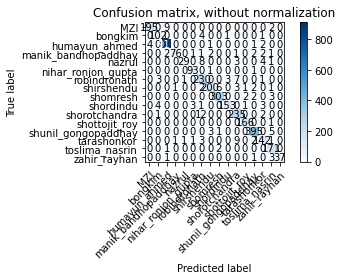

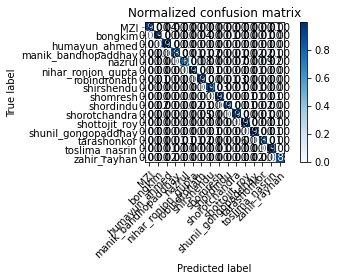

In [ ]:


%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_test, y_test_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=label, yticklabels=label,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.xlim(-0.5, len(np.unique(y_test))-0.5) # ADD THIS LINE
    plt.ylim(len(np.unique(y_test))-0.5, -0.5) # ADD THIS LINE
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_test_pred, classes=label,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_test_pred, classes=label, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# **Decission Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Dmodel = DecisionTreeClassifier ()                

In [ ]:
Dmodel . fit ( sent_vectors , y_train )

DecisionTreeClassifier()

# **CROSS VALIDATION**

In [ ]:
accuracy = cross_val_score(Dmodel, sent_vectors_cv, y_cv, scoring='accuracy', cv = 10)
print(accuracy)

[0.8  0.8  0.81 0.77 0.81 0.8  0.82 0.81 0.82 0.76]


In [ ]:
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

Accuracy of Model with Cross Validation is: 79.8613530778165


In [ ]:
y_test_pred  = Dmodel . predict ( sent_vectors_test )
y_train_pred = Dmodel . predict(sent_vectors)

In [ ]:
#trainaccuracy
print ( 'Model accuracy %s' % accuracy_score ( y_train , y_train_pred ) )

Model accuracy 1.0


In [ ]:
print ( 'Model accuracy %s' % accuracy_score ( y_test , y_test_pred ) )
print ( 'accuracy normalized %s' % accuracy_score ( y_test , y_test_pred , normalize = False ) )
print ( classification_report ( y_test , y_test_pred,target_names = label ) )

Model accuracy 0.8522537562604341
accuracy normalized 3063
                     precision    recall  f1-score   support

                MZI       0.87      0.89      0.88       206
            bongkim       0.78      0.79      0.78       108
      humayun_ahmed       0.95      0.96      0.96       919
manik_bandhopaddhay       0.61      0.60      0.61        88
             nazrul       0.35      0.47      0.40        45
 nihar_ronjon_gupta       0.74      0.77      0.75        95
       robindronath       0.75      0.75      0.75       245
         shirshendu       0.83      0.77      0.80       216
           shomresh       0.87      0.89      0.88       310
          shordindu       0.81      0.84      0.82       165
      shorotchandra       0.83      0.82      0.83       250
      shottojit_roy       0.92      0.91      0.91       167
shunil_gongopaddhay       0.92      0.87      0.89       404
        tarashonkor       0.73      0.74      0.74       160
     toslima_nasrin      

Confusion matrix, without normalization
[[184   0  13   1   0   0   0   1   1   0   0   2   0   0   4   0]
 [  0  85   0   0   1   0  12   0   0   5   4   0   0   1   0   0]
 [ 15   0 882   2   0   0   1   1   4   1   0   1   1   3   5   3]
 [  1   1   1  53   3   4   6   3   2   1   5   0   3   5   0   0]
 [  0   1   0   4  21   2   9   0   1   0   1   0   1   3   1   1]
 [  0   0   2   1   1  73   1   2   3   5   0   1   3   2   1   0]
 [  0   7   1   0  16   3 184   8   0   1  19   2   1   3   0   0]
 [  3   0   5   4   2   2   5 167  18   2   0   1   5   0   2   0]
 [  2   0   3   3   2   4   0  10 276   1   0   1   6   0   2   0]
 [  0  10   0   1   2   1   3   1   0 138   2   2   0   5   0   0]
 [  0   5   0   4   2   0  16   0   0   4 206   0   1  12   0   0]
 [  3   0   0   1   0   2   0   1   4   4   0 152   0   0   0   0]
 [  0   0   5   3   3   5   2   1   5   4   0   3 352   7  12   2]
 [  1   0   0   6   7   0   5   3   0   5  11   1   2 119   0   0]
 [  2   0  13   2   0 

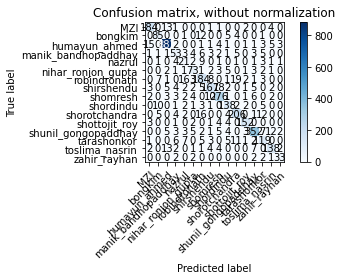

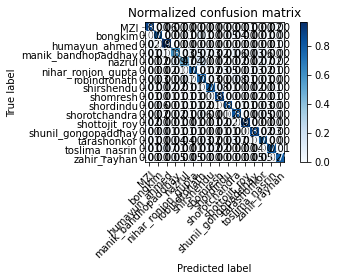

In [ ]:

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_test, y_test_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=label, yticklabels=label,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.xlim(-0.5, len(np.unique(y_test))-0.5) # ADD THIS LINE
    plt.ylim(len(np.unique(y_test))-0.5, -0.5) # ADD THIS LINE
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_test_pred, classes=label,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_test_pred, classes=label, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# **Multinomial Naivebayes(sklearn data transformation)**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Binarizer
Mmodel=make_pipeline(Binarizer(), MultinomialNB())

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(sent_vectors_train)
sent_vectors_train_transformed = scaler.transform(sent_vectors_train)

In [ ]:
Mmodel.fit(sent_vectors_train_transformed, y_train)

Pipeline(steps=[('binarizer', Binarizer()), ('multinomialnb', MultinomialNB())])

# CROSS VALIDATION 

In [ ]:
#using k-fold
accuracy = cross_val_score(Mmodel, sent_vectors_cv, y_cv, scoring='accuracy', cv = 10)
print(accuracy)

[0.79 0.8  0.78 0.81 0.82 0.8  0.82 0.78 0.8  0.79]


In [ ]:
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

Accuracy of Model with Cross Validation is: 79.82578397212544


In [ ]:
sent_vectors_test_transformed = scaler.transform(sent_vectors_test)
y_test_pred  = Mmodel. predict ( sent_vectors_test_transformed )
y_train_pred = Mmodel.predict (sent_vectors)

In [ ]:
from sklearn import metrics
from sklearn . metrics import accuracy_score

In [ ]:
#train accuracy
print ( 'Model accuracy %s' % accuracy_score ( y_train , y_train_pred ) )

Model accuracy 0.6455597112290162


In [ ]:
from sklearn import metrics
from sklearn . metrics import accuracy_score
from sklearn.metrics import classification_report


In [ ]:
print ( 'Model accuracy %s' % accuracy_score ( y_test , y_test_pred ) )
print ( 'accuracy normalized %s' % accuracy_score ( y_test , y_test_pred , normalize = False ) )
print ( classification_report ( y_test , y_test_pred,target_names=label ))

Model accuracy 0.7857540345019477
accuracy normalized 2824
                     precision    recall  f1-score   support

                MZI       0.82      0.87      0.84       206
            bongkim       0.39      0.97      0.56       108
      humayun_ahmed       0.98      0.92      0.95       919
manik_bandhopaddhay       0.78      0.35      0.48        88
             nazrul       0.25      0.76      0.37        45
 nihar_ronjon_gupta       0.82      0.96      0.88        95
       robindronath       0.62      0.16      0.26       245
         shirshendu       0.89      0.86      0.88       216
           shomresh       0.91      0.92      0.91       310
          shordindu       0.96      0.53      0.68       165
      shorotchandra       0.64      0.87      0.74       250
      shottojit_roy       0.97      0.92      0.94       167
shunil_gongopaddhay       0.93      0.70      0.79       404
        tarashonkor       0.78      0.56      0.65       160
     toslima_nasrin      

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Confusion matrix, without normalization
[[179   0  13   0   0   0   0   1   0   0   0   0   0   0  13   0]
 [  0 105   0   0   0   0   0   0   0   0   3   0   0   0   0   0]
 [ 35   0 846   1   1   0   0   1   1   0   0   0   0   2  31   1]
 [  1   3   0  31  12   0   6   2   0   1  11   0   7  10   4   0]
 [  0   4   0   0  34   0   0   0   0   0   4   0   1   2   0   0]
 [  0   0   0   0   0  91   0   1   0   0   0   0   1   0   1   1]
 [  0  73   0   2  55   0  40   0   0   1  64   0   1   5   4   0]
 [  0   2   0   3   0   0   1 186  13   0   2   1   4   1   3   0]
 [  1   0   0   0   0   0   0   6 285   0   0   3   2   0  13   0]
 [  0  53   0   1   0  18   0   0   0  88   0   1   1   2   1   0]
 [  0  18   0   1   0   0  12   0   0   1 217   0   0   1   0   0]
 [  3   0   0   0   0   1   0   0   1   1   0 154   2   0   5   0]
 [  0   0   0   0  25   0   5   9   7   0   0   0 281   2  64  11]
 [  0  12   0   1  10   1   1   0   0   0  36   0   2  90   7   0]
 [  0   0   1   0   0 

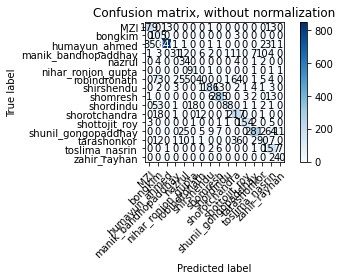

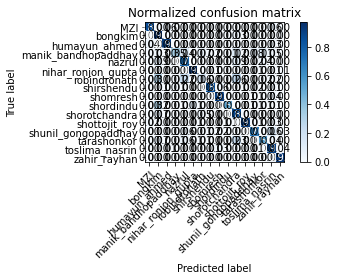

In [ ]:

def plot_confusion_matrix(y_test, y_test_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=label, yticklabels=label,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.xlim(-0.5, len(np.unique(y_test))-0.5) # ADD THIS LINE
    plt.ylim(len(np.unique(y_test))-0.5, -0.5) # ADD THIS LINE
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_test_pred, classes=label,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_test_pred, classes=label, normalize=True,
                      title='Normalized confusion matrix')

plt.show()